### Text Analysis Methods Quick Reference

### TF-IDF

### PMI - Pointwise Mutual Exclusion

### Dirichlet

In [74]:
# Code
%run ./common/widgets_utility
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

    
# Mid-points of triangle sides opposite of each corner
corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

midpoints = [(corners[(i + 1) % 3] + corners[(i + 2) % 3]) / 2.0 \
             for i in range(3)]
def xy2bc(xy, tol=1.e-3):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    s = [(corners[i] - midpoints[i]).dot(xy - midpoints[i]) / 0.75 \
         for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)


from functools import reduce
from math import gamma
from operator import mul
import numpy as np
import math
from operator import mul


class Dirichlet(object):
    
    def __init__(self, alpha):
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) /
                     reduce(mul, [gamma(a) for a in self._alpha])
        
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        
        X = reduce(mul, [xx ** (aa - 1) for (xx, aa) in zip(x, self._alpha)])
        
        return self._coef * X
    
def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
    

In [73]:
# Xode
def display_pdf_contours(a1, a2, a3, subdiv):
    
    alpha = [a1, a2, a3]
    dirichlet_sample = Dirichlet(alpha) 
    print(alpha)
    print(dirichlet_sample._coef)
    print([gamma(a) for a in dirichlet_sample._alpha])
    print(dirichlet_sample.pdf([1,1,1]))

    print(np.random.dirichlet(alpha))
    
    # draw_pdf_contours(Dirichlet([a1, a2, a3]), subdiv=subdiv)

a1=widgets.FloatSlider(description='a1', min=0.001, max=100.0, step=0.01, value=5.0, continuous_update=False)
a2=widgets.FloatSlider(description='a2', min=0.001, max=100.0, step=0.01, value=5.0, continuous_update=False)
a3=widgets.FloatSlider(description='a3', min=0.001, max=100.0, step=0.01, value=5.0, continuous_update=False)

subdiv=widgets.IntSlider(description='n', min=1, max=16, step=1, value=8, continuous_update=False)

w = widgets.interactive(
    display_pdf_contours, a1=a1, a2=a2, a3=a3, subdiv=subdiv
)

display(widgets.VBox([
    widgets.HBox([a1, a2, a3, subdiv]),
    widgets.HBox([w.children[-1]])
]))
w.update()


VBox(children=(HBox(children=(FloatSlider(value=5.0, continuous_update=False, description='a1', min=0.001, step=0.01), FloatSlider(value=5.0, continuous_update=False, description='a2', min=0.001, step=0.01), FloatSlider(value=5.0, continuous_update=False, description='a3', min=0.001, step=0.01), IntSlider(value=8, continuous_update=False, description='n', max=16, min=1))), HBox(children=(Output(),))))

In [26]:
from scipy.special import gamma

In [28]:
gamma(5.1)

27.93175373836837

In [41]:
gamma(0)

inf

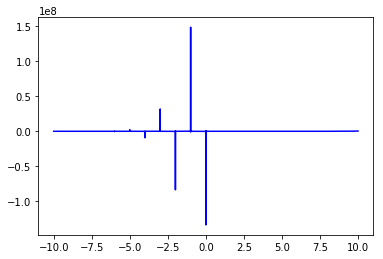

In [55]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(-10, 10., 0.000001)

# red dashes, blue squares and green triangles
plt.plot(t, [ gamma(x) for x in t ], 'b')
plt.show()


In [36]:
gamma(0.0001)

9999.422883231622

In [61]:
gamma(-1000.4)

-0.0

In [66]:
(-2.3)**4


27.98409999999999